# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.8.0
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [25]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [52]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/upgrad AIML/Assignment/assesment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        each_month_df = pd.read_parquet(file_path)

        each_month_df['date'] = each_month_df['tpep_pickup_datetime'].dt.date  
        each_month_df['hour'] = each_month_df['tpep_pickup_datetime'].dt.hour  

        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        unique_dates = each_month_df['date'].unique()
        
        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            # Iterate through each hour of the selected date
            df_date = each_month_df[each_month_df['date'] == date]  
            unique_hours = df_date['hour'].unique()  
            
                # Loop through each hour of that date
            for hour in sorted(unique_hours):
                hour_data = df_date[df_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])  # adding data for this hour to the DF
                
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [53]:
# Store the df in csv/parquet
df.to_parquet('sampled_taxi_data.parquet')
df.to_csv("sampled_taxi_data.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
import os

os.chdir('C:/upgrad AIML/Assignment/assesment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

df = pd.read_parquet('sampled_taxi_data.parquet')


In [5]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [7]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 428 to 2596448
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df.drop(columns=['date','hour'], inplace=True)
df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1991322         1  2023-09-29 23:01:16   2023-09-29 23:06:29              1.0   
1991323         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1991324         2  2023-09-29 23:57:02   2023-09-30 00:14:50              1.0   
1991325         1  2023-09-29 23:50:56   2023-09-29 23:51:24              NaN   
1991326         1  2023-09-29 23:32:59   2023-09-29 23:41:22              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
1                 1.24         1.0                  N           161   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
4                19.24         NaN               None            66   
...                ...         ...                ...           ...   
1991322           0.50         1.0                  N           211   
1991323           3.32         1.0                  N           249   
1991324          10.19         1.0                  N           138   
1991325           0.00         NaN               None           144   
1991326           1.20         1.0                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40    6.0      0.5        0.00   
1                 237             1         7.90    1.0      0.5        2.58   
2                 141             2        11.40    1.0      0.5        0.00   
3                 142             2         6.50    1.0      0.5        0.00   
4                 107             0        25.64    0.0      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
1991322           249             2         6.50    3.5      0.5        0.00   
1991323            48             1        18.40    1.0      0.5        4.68   
1991324           263             1        39.40    6.0      0.5       10.46   
1991325           144             0        22.28    0.0      0.5        0.00   
1991326           231             1        10.00    3.5      0.5        3.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
4                0.00                    1.0         35.57   
...               ...                    ...           ...   
1991322          0.00                    1.0         11.50   
1991323          0.00                    1.0         28.08   
1991324          6.94                    1.0         68.55   
1991325          0.00                    1.0         26.28   
1991326          0.00                    1.0         18.00   

         congestion_surcharge  airport_fee  Airport_fee  
0                         0.0         1.25          NaN  
1                         2.5         0.00          NaN  
2                         2.5         0.00          NaN  
3                         2.5         0.00          NaN  
4                         NaN          NaN          NaN  
...                       ...          ...          ...  
1991322                   2.5          NaN         0.00  
1991323      

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
df["airport_fee_total"] = df["airport_fee"].fillna(0) + df["Airport_fee"].fillna(0)
df = df.drop(columns=["airport_fee", "Airport_fee"])



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative

negative_fares = df[df["fare_amount"] < 0]
print(negative_fares)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_total]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [11]:
# Analyse RatecodeID for the negative fare amounts

negative_fare_df = df[df["fare_amount"] < 0]
ratecode_counts = negative_fare_df["RatecodeID"].value_counts()
print(ratecode_counts)

overall_ratecode_counts = df["RatecodeID"].value_counts()
print(overall_ratecode_counts)

# Percentage of negative fares per RatecodeID
negative_ratecode_percentage = (negative_fare_df["RatecodeID"].value_counts() / df["RatecodeID"].value_counts()) * 100


Series([], Name: count, dtype: int64)
RatecodeID
1.0     1815901
2.0       75176
99.0      11000
5.0       10798
3.0        6419
4.0        3898
6.0           3
Name: count, dtype: int64


In [12]:
# Find which columns have negative values

negative_columns = []

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if (df[column] < 0).any():  # Check if there's any negative value
        negative_columns.append(column)


print("Columns with negative values:", negative_columns)


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_total']


In [13]:
# fix these negative values
negative_columns = []

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if (df[column] < 0).any():  # Check if there's any negative value
        negative_columns.append(column)


for column in negative_columns:
    df[column] = df[column].abs()


negative_columns = []

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if (df[column] < 0).any():  # Check if there's any negative value
        negative_columns.append(column)


print("Columns with negative values:", negative_columns)

Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [14]:
# Find the proportion of missing values in each column

missing_proportion = df.isna().mean() * 100
print("Proportion of missing values in each column:\n", missing_proportion)


Proportion of missing values in each column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421437
trip_distance            0.000000
RatecodeID               3.421437
store_and_fwd_flag       3.421437
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421437
airport_fee_total        0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [15]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_data_rows = df[df.isna().any(axis=1)]
print("Rows with missing data:\n", missing_data_rows)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())
print(df['passenger_count'].isna().sum())
print("Missing values after imputation:", df['passenger_count'].isna().sum())


Rows with missing data:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
2995167         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
2995165         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
2995317         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
2995090         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
2840859         2  2023-09-29 19:55:27   2023-09-29 20:04:28              NaN   
2840922         2  2023-09-29 19:39:00   2023-09-29 19:49:00              NaN   
2840645         2  2023-09-29 19:32:02   2023-09-29 19:55:48              NaN   
2841813         2  2023-09-29 23:01:21   2023-09-29 23:15:00              NaN   
2841921         1  2023-09-29 23:50:56   2023-09-29 23:51:24              NaN   

  

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [16]:
# Fix missing values in 'RatecodeID'
mean_value = df['RatecodeID'].mean()
df['RatecodeID'] = df['RatecodeID'].fillna(mean_value)
print("Missing values in 'RatecodeID' after imputation:", df['RatecodeID'].isna().sum())


Missing values in 'RatecodeID' after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [17]:
# handle null values in congestion_surcharge
mean_value = df['congestion_surcharge'].mean()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mean_value)
print("Missing values in 'congestion_surcharge' after imputation:", df['congestion_surcharge'].isna().sum())



Missing values in 'congestion_surcharge' after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [93]:
# Handle any remaining missing values

missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    if df[column].isna().sum() > 0:
      
        df[column] = df[column].fillna(method ='ffill')

print("Missing values after imputation:\n", missing_values[missing_values > 0])

missing_store_and_fwd_flag_rows = df[df['store_and_fwd_flag'].isna()]
unique_values = df['store_and_fwd_flag'].unique()
print("Unique values :", unique_values)

# since store_and_fwd_flag has unique values as 'N', None and 'Y'  going ahead with replacing None with N
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

missing_values = df.isna().sum()

print("Missing values after imputation:\n", missing_values[missing_values > 0])

df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

df.describe()


Missing values per column:
 Series([], dtype: int64)
Missing values after imputation:
 Series([], dtype: int64)
Unique values : ['N' 'Y']
Missing values after imputation:
 Series([], dtype: int64)


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.991204e+06                     1991204                     1991204   
mean   1.732872e+00  2023-07-02 19:53:58.487350  2023-07-02 20:11:24.227259   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:07:35.750000         2023-04-02 16:26:58   
50%    2.000000e+00  2023-06-27 15:39:30.500000  2023-06-27 15:56:51.500000   
75%    2.000000e+00  2023-10-06 19:33:39.500000  2023-10-06 19:48:37.750000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.468760e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.991204e+06   1.991204e+06  1.991204e+06  1.991204e+06   
mean      1.356213e+00   3.863085e+00  1.634605e+00  1.652757e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.796922e-01   1.287939e+02  7.266180e+00  6.399450e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.991204e+06  1.991204e+06  1.991204e+06  1.991204e+06  1.991204e+06   
mean   1.640451e+02  1.163876e+00  1.991135e+01  1.588249e+00  4.953149e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.979979e+01  5.081930e-01  1.030685e+02  1.829597e+00  4.846637e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.991204e+06  1.991204e+06           1.991204e+06  1.991204e+06   
mean   3.546622e+00  5.965887e-01           9.990805e-01  2.897420e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.055731e+00  2.187400e+00           2.799949e-02  1.039682e+02   

       congestion_surcharge  airport_fee_total  
count          1.991204e+06       1.991204e+06  
mean           2.307857e+00       1.379761e-01  
min            0.000000e+00       0.000000e+00  
25%            2.500000e+00       0.000000e+00  
50%            2.500000e+00       0.000000e+00  
75%            2.500000e+00       0.000000e+00  
max            2.500000e+00       1.750000e+00  
std            6.544329e-01       4.575291e-01

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [18]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Describe the data and check for any potential outliers
print("Summary of the data:\n", df.describe())

# Convert the timestamp columns to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Convert amount related columns to numeric (float)
monetary_columns = ['fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
df[monetary_columns] = df[monetary_columns].apply(pd.to_numeric)

# Check for rows where drop-off time is earlier than pickup time
out_of_place_times = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
print(out_of_place_times)

# Check for missing values in datetime columns
print("tpep_pickup_datetime = ", df[df['tpep_pickup_datetime'].isna()])
print("tpep_dropoff_datetime =", df[df['tpep_dropoff_datetime'].isna()])

# Remove rows where drop-off time is earlier than pickup time
df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

# Remove rows with NaT (Not a Time) in any datetime column
df_cleaned = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Fill missing values in other columns
df_cleaned['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df_cleaned['fare_amount'].fillna(df['fare_amount'].median(), inplace=True)
df_cleaned['store_and_fwd_flag'].fillna('N', inplace=True)

# Print the sum of missing values
print(df_cleaned.isnull().sum())

# Get the numerical columns for IQR calculation
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each numerical column to identify potential outliers
Q1 = df_cleaned[numerical_columns].quantile(0.25)  # 25th percentile (1st quartile)
Q3 = df_cleaned[numerical_columns].quantile(0.75)  # 75th percentile (3rd quartile)
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in the numerical columns
outliers = (df_cleaned[numerical_columns] < lower_bound) | (df_cleaned[numerical_columns] > upper_bound)

# Display the rows with outliers in any numerical columns
outlier_rows = df_cleaned[outliers.any(axis=1)]

# Display the outlier rows
print("Rows with potential outliers:\n", outlier_rows)

# Remove rows that contain outliers in any numerical column
df_cleaned = df_cleaned[~outliers.any(axis=1)]

# Reset the index after removing outliers
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame shape after removing outliers
print(df_cleaned.shape)


Summary of the data:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.991327e+06                     1991327                     1991327   
mean   1.733027e+00  2023-07-02 19:56:59.353727  2023-07-02 20:14:24.971398   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:07:35         2023-04-02 16:26:48   
50%    2.000000e+00         2023-06-27 15:42:38         2023-06-27 15:59:44   
75%    2.000000e+00  2023-10-06 19:35:42.500000  2023-10-06 19:51:36.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476258e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.991327e+06   1.991327e+06  1.991327e+06  1.991327e+06   
mean      1.368815e+00   3.863202e+00  1.634837e+00  1.652791e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.0000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [19]:
# remove passenger_count > 6
df_cleaned = df_cleaned[df_cleaned['passenger_count'] <= 6]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994031 entries, 0 to 994030
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               994031 non-null  int64         
 1   tpep_pickup_datetime   994031 non-null  datetime64[us]
 2   tpep_dropoff_datetime  994031 non-null  datetime64[us]
 3   passenger_count        994031 non-null  float64       
 4   trip_distance          994031 non-null  float64       
 5   RatecodeID             994031 non-null  float64       
 6   store_and_fwd_flag     994031 non-null  object        
 7   PULocationID           994031 non-null  int64         
 8   DOLocationID           994031 non-null  int64         
 9   payment_type           994031 non-null  int64         
 10  fare_amount            994031 non-null  float64       
 11  extra                  994031 non-null  float64       
 12  mta_tax                994031 non-null  floa

In [109]:
# Continue with outlier handling
# 1. Entries where trip_distance is nearly 0 and fare_amount is more than 300
df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] < 0.1) & (df_cleaned['fare_amount'] > 300))]

# 2. Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] == 0) & (df_cleaned['fare_amount'] == 0) & (df_cleaned['PULocationID'] != df_cleaned['DOLocationID']))]

# 3. Entries where trip_distance is more than 250 miles
df_cleaned = df_cleaned[df_cleaned['trip_distance'] <= 250]

# 4. Entries where payment_type is 0
df_cleaned = df_cleaned[df_cleaned['payment_type'] != 0]

df_cleaned.duplicated().sum()  # Check for duplicate rows
df_cleaned.drop_duplicates(inplace=True)  # Remove duplicates

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994030 entries, 0 to 994030
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               994030 non-null  int64         
 1   tpep_pickup_datetime   994030 non-null  datetime64[us]
 2   tpep_dropoff_datetime  994030 non-null  datetime64[us]
 3   passenger_count        994030 non-null  float64       
 4   trip_distance          994030 non-null  float64       
 5   RatecodeID             994030 non-null  float64       
 6   store_and_fwd_flag     994030 non-null  object        
 7   PULocationID           994030 non-null  int64         
 8   DOLocationID           994030 non-null  int64         
 9   payment_type           994030 non-null  int64         
 10  fare_amount            994030 non-null  float64       
 11  extra                  994030 non-null  float64       
 12  mta_tax                994030 non-null  float64  

In [20]:
# Do any columns need standardising?
"""
These columns may need standardizing:

fare_amount

trip_distance

tip_amount

total_amount

tolls_amount

improvement_surcharge

congestion_surcharge

airport_fee_total

These columns are numeric and likely have different ranges, so standardizing them could improve model performance."
"""


'\nThese columns may need standardizing:\n\nfare_amount\n\ntrip_distance\n\ntip_amount\n\ntotal_amount\n\ntolls_amount\n\nimprovement_surcharge\n\ncongestion_surcharge\n\nairport_fee_total\n\nThese columns are numeric and likely have different ranges, so standardizing them could improve model performance."\n'

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [54]:
df.columns.tolist()

df_cleaned.to_parquet('sampled_taxi_data_cleaned.parquet')
df_cleaned.to_csv("sampled_taxi_data_cleaned.csv")

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Answer: All the below are numerical !!!

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

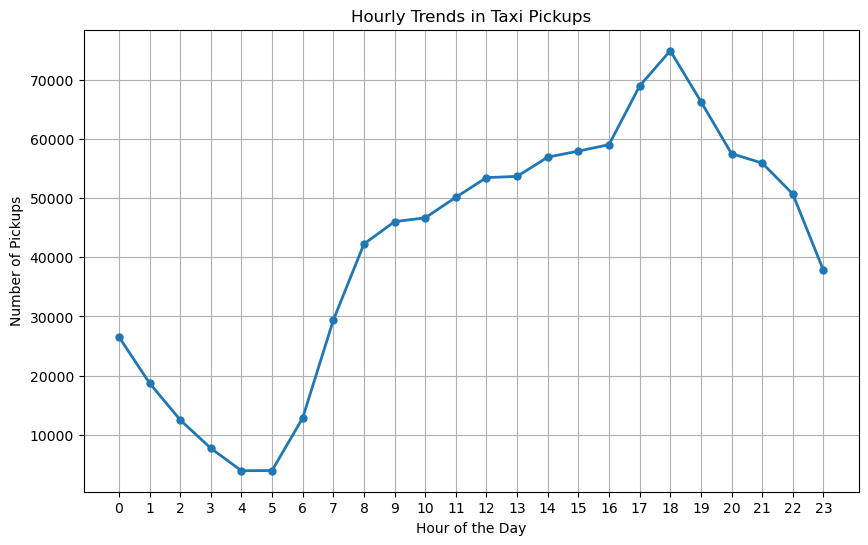

In [22]:
# Find and show the hourly trends in taxi pickups

# Extract the hour from the pickup datetime
df_cleaned['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.hour

# number of pickups for each hour
pickup_hourly_trends = df_cleaned['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
pickup_hourly_trends.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()


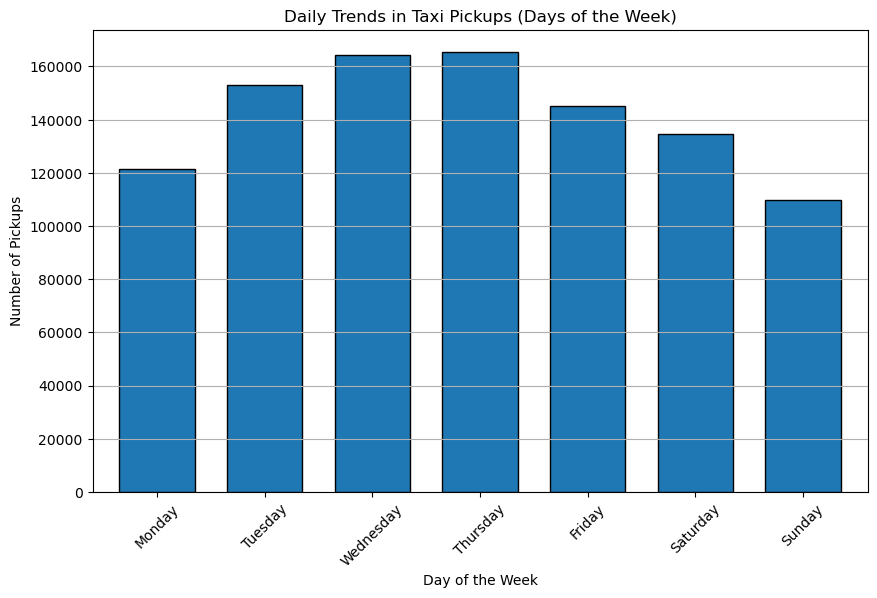

In [26]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week from the pickup datetime
df_cleaned['pickup_day_of_week'] = df_cleaned['tpep_pickup_datetime'].dt.day_name()

# number of pickups for each day of the week
pickup_daily_trends = df_cleaned['pickup_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
pickup_daily_trends.plot(kind='bar',  edgecolor='black', width=0.7)
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


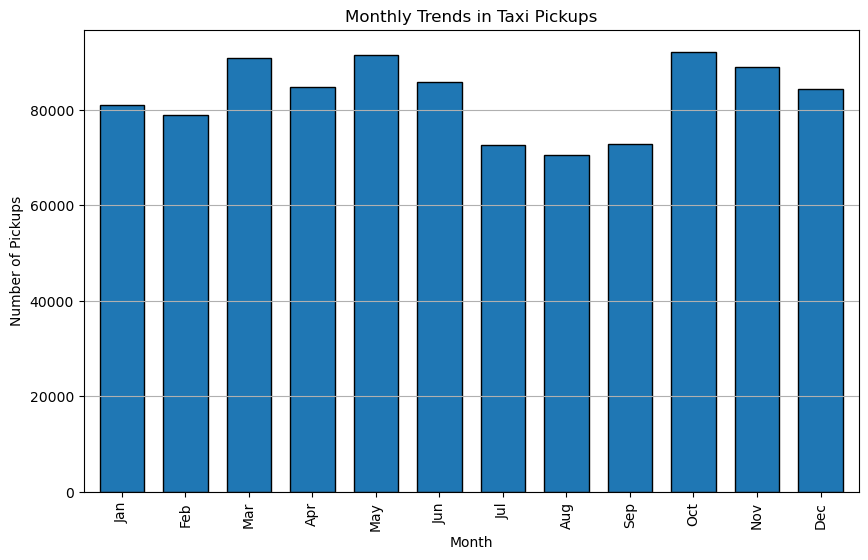

In [24]:
# Show the monthly trends in pickups
# Extract the month from the pickup datetime
df_cleaned['pickup_month'] = df_cleaned['tpep_pickup_datetime'].dt.month

# number of pickups for each month
pickup_monthly_trends = df_cleaned['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
pickup_monthly_trends.plot(kind='bar', edgecolor='black', width=0.7)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Answer: Yes some of them have Zero values, but none of them have negative values

In [27]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df_cleaned[financial_columns] = df_cleaned[financial_columns].apply(pd.to_numeric, errors='coerce')  

invalid_values = df_cleaned[df_cleaned[financial_columns].le(0).any(axis=1)]

invalid_values

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
50             2  2023-01-01 00:16:09   2023-01-01 00:21:15              1.0   
127            2  2023-01-01 01:03:34   2023-01-01 01:10:57              1.0   
135            2  2023-01-01 01:36:14   2023-01-01 01:47:33              1.0   
218            1  2023-01-01 02:36:07   2023-01-01 02:38:04              1.0   
...          ...                  ...                   ...              ...   
993963         1  2023-09-29 16:42:33   2023-09-29 17:04:20              1.0   
993968         2  2023-09-29 17:18:48   2023-09-29 17:31:23              1.0   
993996         2  2023-09-29 19:26:30   2023-09-29 19:44:48              1.0   
994023         2  2023-09-29 22:33:34   2023-09-29 22:37:08              1.0   
994025         2  2023-09-29 23:29:16   2023-09-29 23:42:24              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                0.74         1.0                  N           229   
50               0.67         1.0                  N           125   
127              1.98         1.0                  N           170   
135              1.94         1.0                  N           113   
218              0.30         1.0                  N            48   
...               ...         ...                ...           ...   
993963           2.30         1.0                  N           141   
993968           2.21         1.0                  N           229   
993996           2.90         1.0                  N           231   
994023           0.79         1.0                  N           141   
994025           2.08         1.0                  N            48   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
4                141             1  ...      0.5         0.0           0.0   
50               231             1  ...      0.5         0.0           0.0   
127              141             1  ...      0.5         0.0           0.0   
135              246             1  ...      0.5         0.0           0.0   
218              143             1  ...      0.5         0.0           0.0   
...              ...           ...  ...      ...         ...           ...   
993963           100             1  ...      0.5         0.0           0.0   
993968            79             1  ...      0.5         0.0           0.0   
993996            68             1  ...      0.5         0.0           0.0   
994023           141             1  ...      0.5         0.0           0.0   
994025           170             1  ...      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
4                         1.0          10.8                   2.5   
50                        1.0          11.5                   2.5   
127                       1.0          15.7                   2.5   
135                       1.0          17.1                   2.5   
218                       1.0           9.4                   2.5   
...                       ...           ...                   ...   
993963                    1.0          25.6                   2.5   
993968                    1.0          20.0                   2.5   
993996                    1.0          25.6                   2.5   
994023                    1.0          10.8                   2.5   
994025                    1.0          18.5                   2.5   

        airport_fee_total  pickup_hour  pickup_day_of_week  pickup_month  
4                     0.0            0              Sunday             1  
50                    0.0            0              Sunday             1  
127                   0.0            1              Sunday             1  
135                   0.0            1              Sunday             1  
218                   0.0            2              Sunday       

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Answer: Yes it would be beneficial to create a copy of DataFrame leaving out the zero values as it would improve the quality of data and better insights and better model performance


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Answer: It is better to drop such scenarios as it might be very small number is i could check with my analysis by comparing with trips greater than 0

In [28]:
# Create a df with non zero entries for the selected parameters.

# Filter out rows with zero or negative values in the specified financial columns, but keep trip_distance = 0
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df_cleaned[
    (df_cleaned[financial_columns].gt(0).all(axis=1)) & (df_cleaned['trip_distance'] > 0)
].copy()

# Check the shape of the filtered DataFrame
df_non_zero.shape


(958906, 22)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    pickup_month  total_amount
0              1    1646343.80
1              2    1620144.21
2              3    1891324.96
3              4    1766075.77
4              5    1951982.29
5              6    1812559.86
6              7    1499960.41
7              8    1454262.88
8              9    1566751.41
9             10    1984905.59
10            11    1906107.53
11            12    1809818.68


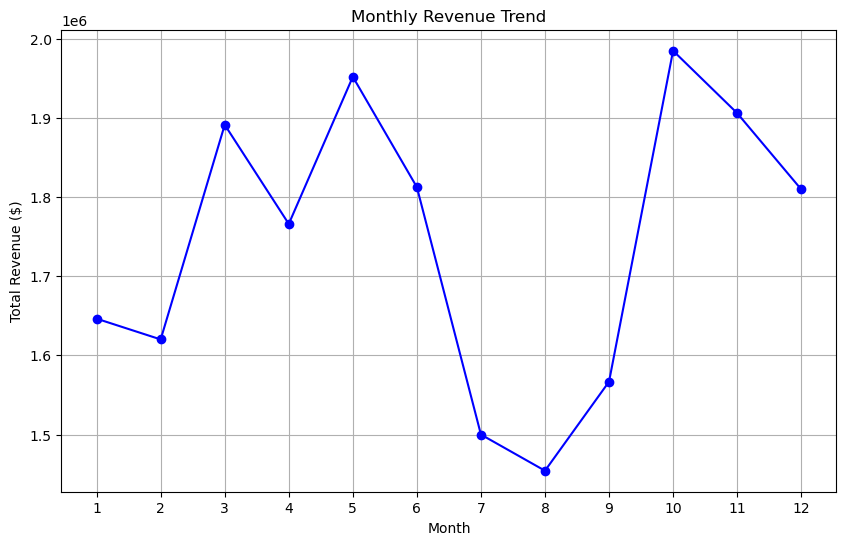

In [29]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()

monthly_revenue = monthly_revenue.sort_values(by='pickup_month')

print(monthly_revenue)

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', linestyle='-', color='b')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(monthly_revenue['pickup_month'])  # Ensure all months are labeled
plt.grid(True)
plt.show()





**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  proportion
0      Q1    5157812.97    0.246664
1      Q2    5530617.92    0.264493
2      Q3    4520974.70    0.216209
3      Q4    5700831.80    0.272634


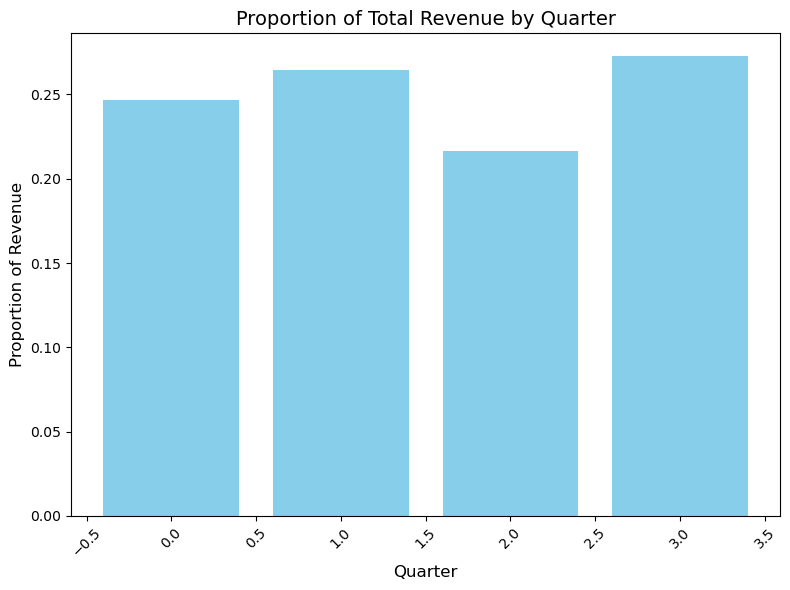

In [117]:
# Calculate proportion of each quarter

# Create a new column to represent the quarter based on pickup_month
def assign_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df_non_zero['quarter'] = df_non_zero['pickup_month'].apply(assign_quarter)

quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print(quarterly_revenue)


plt.figure(figsize=(8, 6))
plt.bar(quarterly_revenue.index, quarterly_revenue['proportion'], color='skyblue')
plt.title('Proportion of Total Revenue by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Proportion of Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

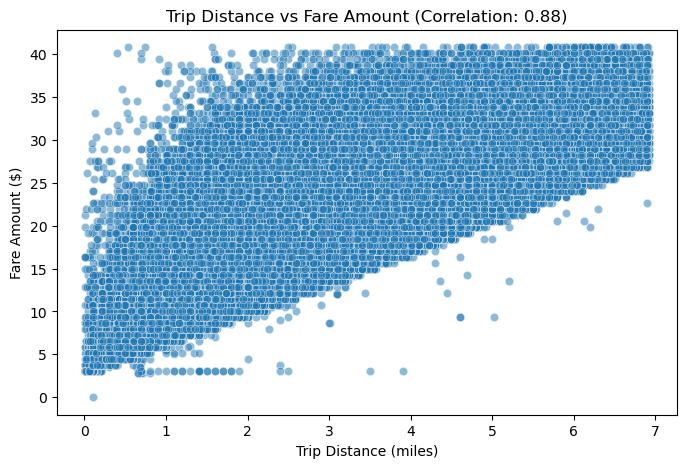

Correlation between trip distance and fare amount: 0.8849529287502387


In [31]:
# Show how trip fare is affected by distance

df_filtered = df_cleaned[df_cleaned["trip_distance"] > 0]

# Calculate correlation
correlation = df_filtered["trip_distance"].corr(df_filtered["fare_amount"])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x="trip_distance", y="fare_amount", alpha=0.5)
plt.title(f"Trip Distance vs Fare Amount (Correlation: {correlation:.2f})")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

print("Correlation between trip distance and fare amount:", correlation)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

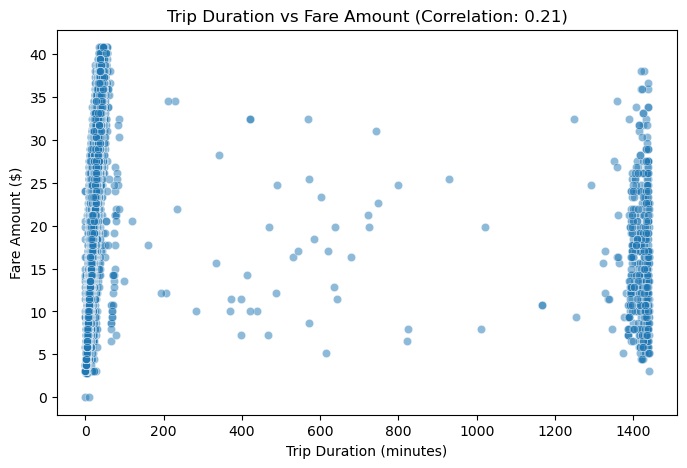

Correlation between trip duration and fare amount: 0.21316763101880634


In [32]:
# Show relationship between fare and trip duration

# Compute trip duration in minutes
df_cleaned["trip_duration"] = (df_cleaned["tpep_dropoff_datetime"] - df_cleaned["tpep_pickup_datetime"]).dt.total_seconds() / 60

df_filtered = df_cleaned[df_cleaned["trip_duration"] > 0]

correlation = df_filtered["trip_duration"].corr(df_filtered["fare_amount"])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x="trip_duration", y="fare_amount", alpha=0.5)
plt.title(f"Trip Duration vs Fare Amount (Correlation: {correlation:.2f})")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

print("Correlation between trip duration and fare amount:", correlation)


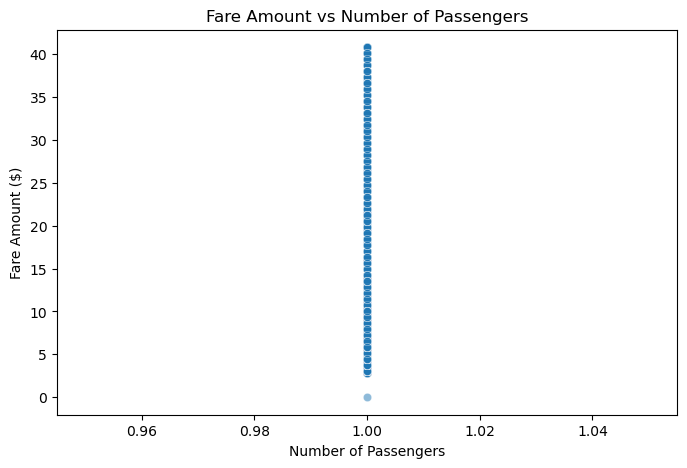

Correlation between passenger count and fare amount: nan


In [146]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x="passenger_count", y="fare_amount", alpha=0.5)
plt.title("Fare Amount vs Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.show()

correlation = df_cleaned["passenger_count"].corr(df_cleaned["fare_amount"])

print("Correlation between passenger count and fare amount:", correlation)

############################# Getting the Corelation as NAN because passenger_count is kind of constant considering the sample size!!!!!!!!!!!!!!!!!!!!!!


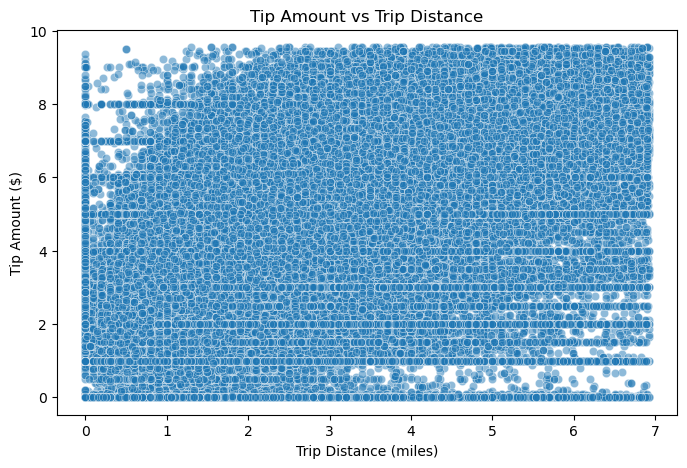

Correlation between trip distance and tip amount: 0.5552352119277255


In [33]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x="trip_distance", y="tip_amount", alpha=0.5)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

correlation = df_cleaned["trip_distance"].corr(df_cleaned["tip_amount"])

print("Correlation between trip distance and tip amount:", correlation)



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Unique payment types: [1]


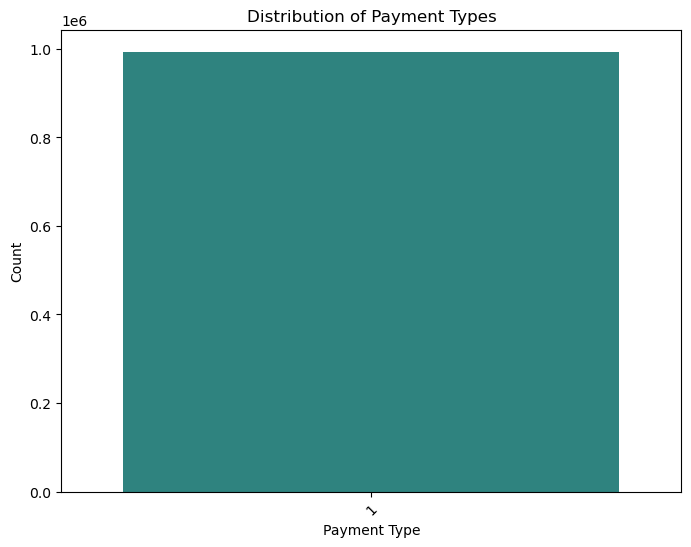

In [35]:
# Analyse the distribution of different payment types (payment_type).

print("Unique payment types:", df_cleaned['payment_type'].unique())
payment_type_counts = df_cleaned['payment_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="viridis")
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)  
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [36]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [39]:
# import geopandas as gpd

import geopandas as gpd 

# Read the shapefile using geopandas
zones = gpd.read_file('C:/upgrad AIML/Assignment/assesment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

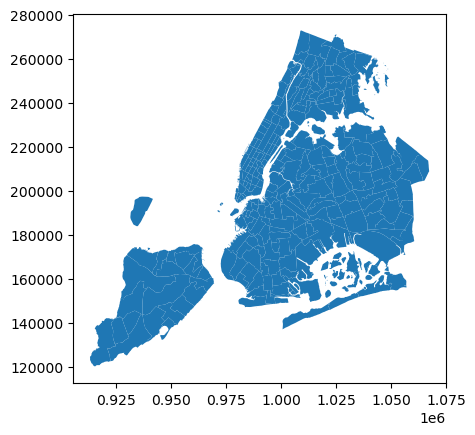

In [40]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [44]:
# Merge zones and trip records using locationID and PULocationID
df_cleaned["PULocationID"] = df_cleaned["PULocationID"].astype(str)
zones["LocationID"] = zones["LocationID"].astype(str)
merged_df = df_cleaned.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
print(merged_df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
1         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
2         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
3         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
4         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   

   trip_distance  RatecodeID store_and_fwd_flag PULocationID  DOLocationID  \
0           3.16         1.0                  N           79           256   
1           2.78         1.0                  N           79           186   
2           4.37         1.0                  N          142           148   
3           2.43         1.0                  N          144           186   
4           0.74         1.0                  N          229           141   

   payment_type  ...  pickup_day_of_week  pickup_month  trip_duration  \
0      

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [118]:
# Group data by location and calculate the number of trips
zones['LocationID'] = zones['LocationID'].astype(int)
df_cleaned['PULocationID'] = df_cleaned['PULocationID'].astype(int)

# Group by PULocationID to get trip counts
trip_counts = df_cleaned.groupby("PULocationID").size().reset_index(name="trip_count")

# Merge with zones to get zone names
trip_counts_with_names = trip_counts.merge(zones[['LocationID', 'zone']], 
                                           left_on="PULocationID", 
                                           right_on="LocationID", 
                                           how="left")

# Display the top 10 pickup locations with zone names
top_10_pickups = trip_counts_with_names.sort_values(by="trip_count", ascending=False).head(10)
print(top_10_pickups[['PULocationID', 'zone', 'trip_count']])



     PULocationID                          zone  trip_count
100           237         Upper East Side South       57015
66            161                Midtown Center       52311
99            236         Upper East Side North       51116
67            162                  Midtown East       42965
77            186  Penn Station/Madison Sq West       39480
56            142           Lincoln Square East       37888
74            170                   Murray Hill       34849
97            234                      Union Sq       32650
102           239         Upper West Side South       32140
68            163                 Midtown North       32025


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts = df_cleaned.groupby("PULocationID").size().reset_index(name="trip_count")

zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill missing values with 0 (in case some locations have no trips)
zones["trip_count"] = zones["trip_count"].fillna(0)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---


After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

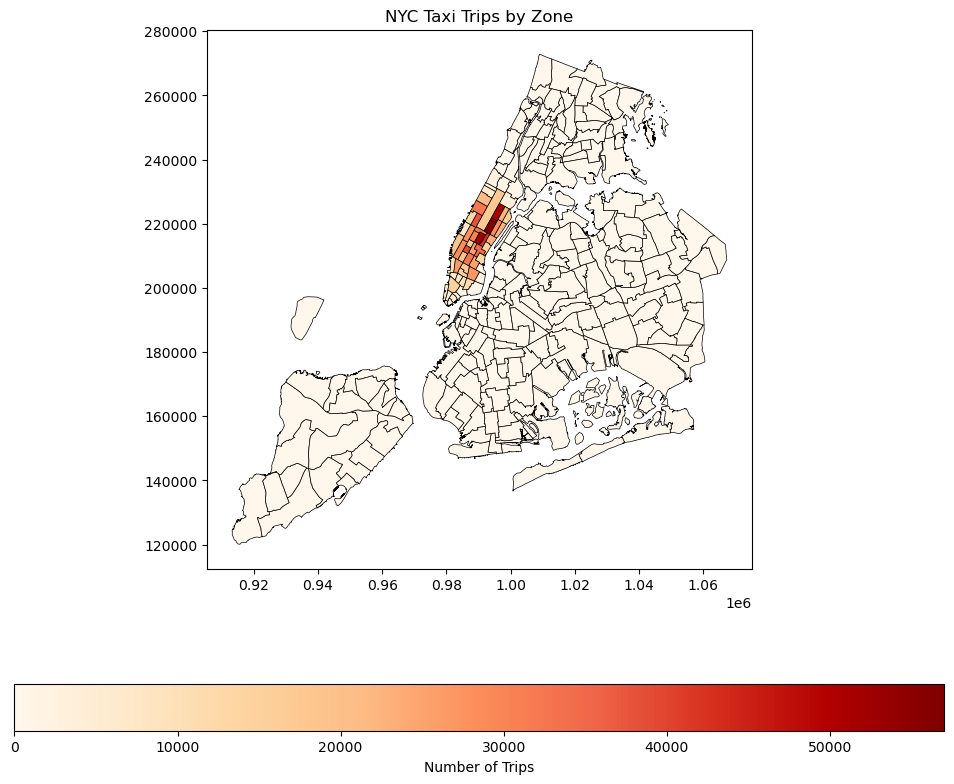

In [86]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#zones.info()

# Plot the map and display it
zones.plot(
    column="trip_count",  # Color zones based on trip counts
    ax=ax,
    cmap="OrRd",  # Color map (Orange-Red)
    edgecolor="black",  # Outline for zones
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
)
plt.title("NYC Taxi Trips by Zone")
plt.show()


In [51]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="trip_count", ascending=False)
print(zones_sorted[['LocationID', 'zone', 'trip_count']].head(10))

    LocationID                          zone  trip_count
236        237         Upper East Side South     57017.0
160        161                Midtown Center     52311.0
235        236         Upper East Side North     51117.0
161        162                  Midtown East     42966.0
185        186  Penn Station/Madison Sq West     39480.0
141        142           Lincoln Square East     37888.0
169        170                   Murray Hill     34850.0
233        234                      Union Sq     32650.0
238        239         Upper West Side South     32141.0
162        163                 Midtown North     32025.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [119]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in hours
df_cleaned["trip_duration"] = (df_cleaned["tpep_dropoff_datetime"] - df_cleaned["tpep_pickup_datetime"]).dt.total_seconds() / 3600

df_cleaned = df_cleaned[df_cleaned["trip_duration"] > 0]

# Group by route (PULocationID, DOLocationID) and hour
slowest_routes = df_cleaned.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    total_distance=("trip_distance", "sum"),
    avg_duration=("trip_duration", "mean")
).reset_index()


# Calculate speed
slowest_routes["speed"] = slowest_routes["total_distance"] / slowest_routes["avg_duration"]

zones["LocationID"] = zones["LocationID"].astype(int)
pickup_zones = zones[["LocationID", "zone"]].rename(
    columns={"LocationID": "PULocationID", "zone": "pickup_zone"}
)
dropoff_zones = zones[["LocationID", "zone"]].rename(
    columns={"LocationID": "DOLocationID", "zone": "dropoff_zone"}
)
slowest_routes = slowest_routes.merge(
    pickup_zones, on="PULocationID", how="left"
).merge(
    dropoff_zones, on="DOLocationID", how="left"
)

# Get the slowest routes by sorting
slowest_routes = slowest_routes.sort_values(by="speed", ascending=True)

# Display the slowest routes at different times of the day
print(slowest_routes.head(10))  # Top 10 slowest routes


       PULocationID  DOLocationID  pickup_hour  total_distance  avg_duration  \
10880            79           165           23             0.0      0.786389   
2999             43           112           17             0.0      0.352222   
61495           249           257           21             0.0      0.412222   
13758            90            80           23             0.0      0.483056   
36882           163           112            4             0.0      0.245000   
65180           264            75           20             0.0      0.264444   
11756            87            65           21             0.0      0.231667   
60058           249             7            6             0.0      0.357222   
45206           224            75           20             0.0      0.324722   
7347             66           148           11             0.0      0.344722   

       speed                     pickup_zone                 dropoff_zone  
10880    0.0                    East Villag

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

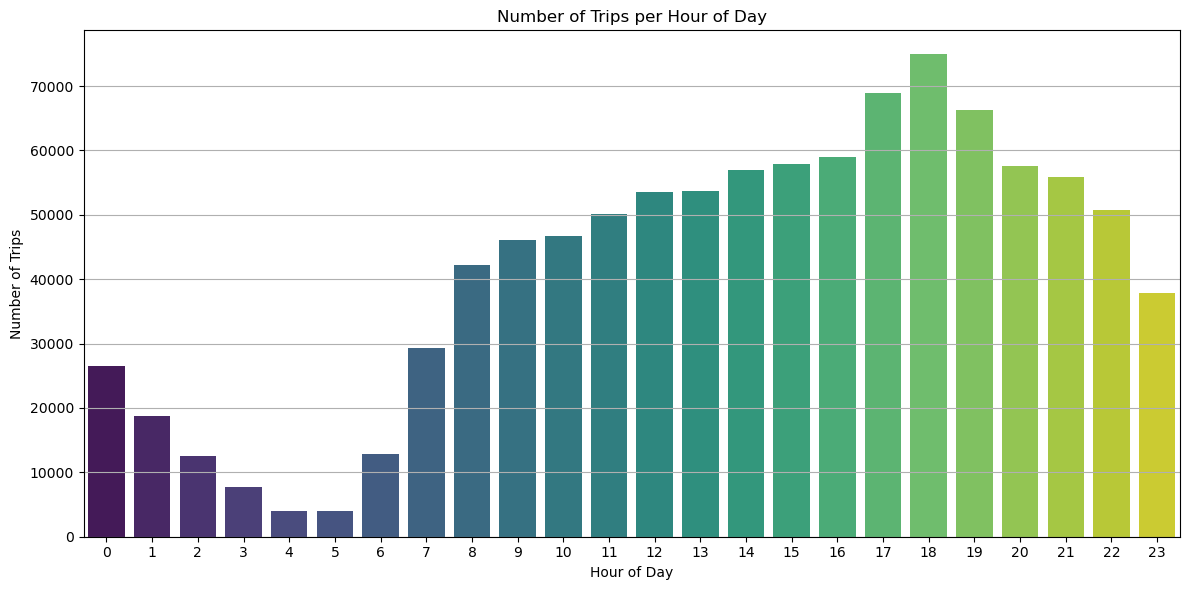

Busiest hour: 18:00 with 74,917 trips


In [120]:
# Visualise the number of trips per hour and find the busiest hour
#df_cleaned.info()
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of trips per pickup hour
trips_per_hour = df_cleaned['pickup_hour'].value_counts().sort_index()

# Plotting the trip count per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")
plt.title("Number of Trips per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Finding the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()
print(f"Busiest hour: {busiest_hour}:00 with {busiest_hour_count:,} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [59]:
# Scale up the number of trips
# preciously used fraction is 0.05
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
# Count trips by pickup hour
pickup_hour_counts = df_cleaned['pickup_hour'].value_counts().sort_values(ascending=False)

# top 5 busiest pickup hours
top_5_hours = pickup_hour_counts.head(5).sort_index()

# the Scaled up the trip counts to get estimated actual numbers
scaled_trip_counts = (top_5_hours / sample_fraction).astype(int)


print("Estimated number of trips in the 5 busiest hours:")
print(scaled_trip_counts)


Estimated number of trips in the 5 busiest hours:
pickup_hour
15    1158980
16    1180840
17    1379060
18    1498340
19    1326660
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

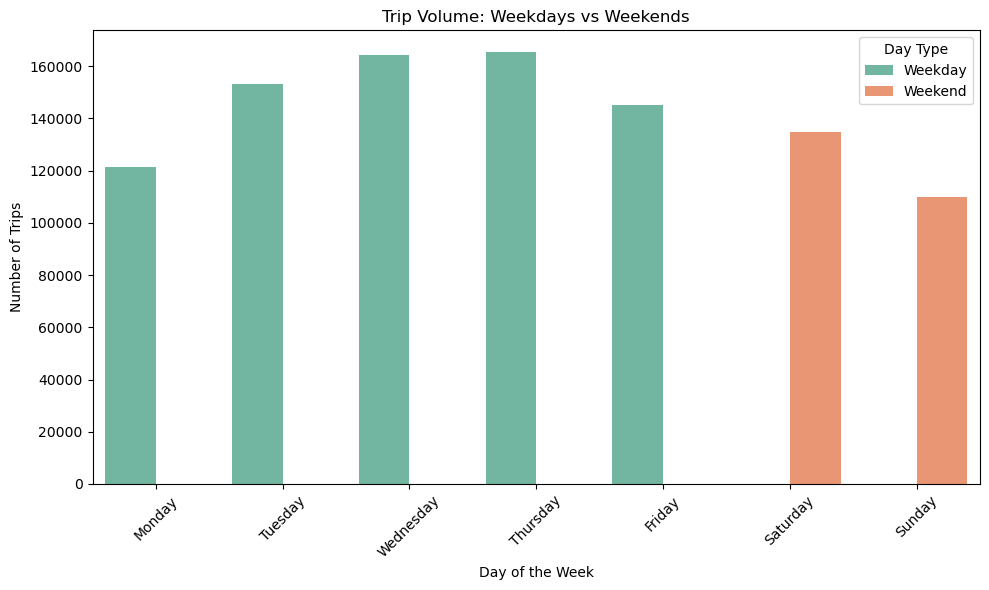

In [60]:
# Compare traffic trends for the week days and weekends

# Group trip counts by day
trips_by_day = df_cleaned['pickup_day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Create a DataFrame for plotting
day_df = trips_by_day.reset_index()
day_df.columns = ['Day', 'Trip Count']

# Mark weekdays and weekends
day_df['Day Type'] = day_df['Day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='Day', y='Trip Count', hue='Day Type', palette='Set2')
plt.title('Trip Volume: Weekdays vs Weekends')
plt.ylabel('Number of Trips')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Higher Demand on Certain Days  like Weekdays (especially Monday–Friday) which often show morning and evening peaks since we have taken busiest hours, aligned with commute hours.

Weekends show midday or late-night peaks, reflecting lower activity.

Finding busy and quiet day helps us in better transportation planning, pricing strategies, and fleet optimization, operational efficienncy.



**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

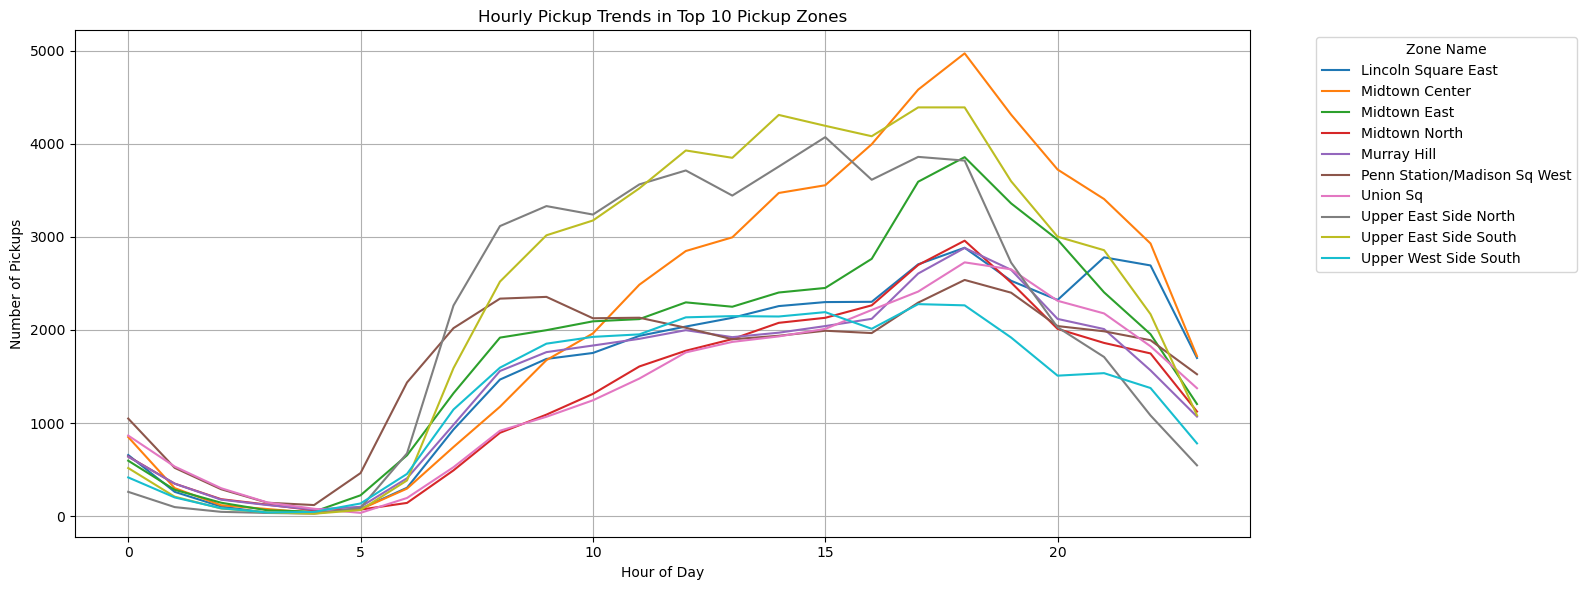

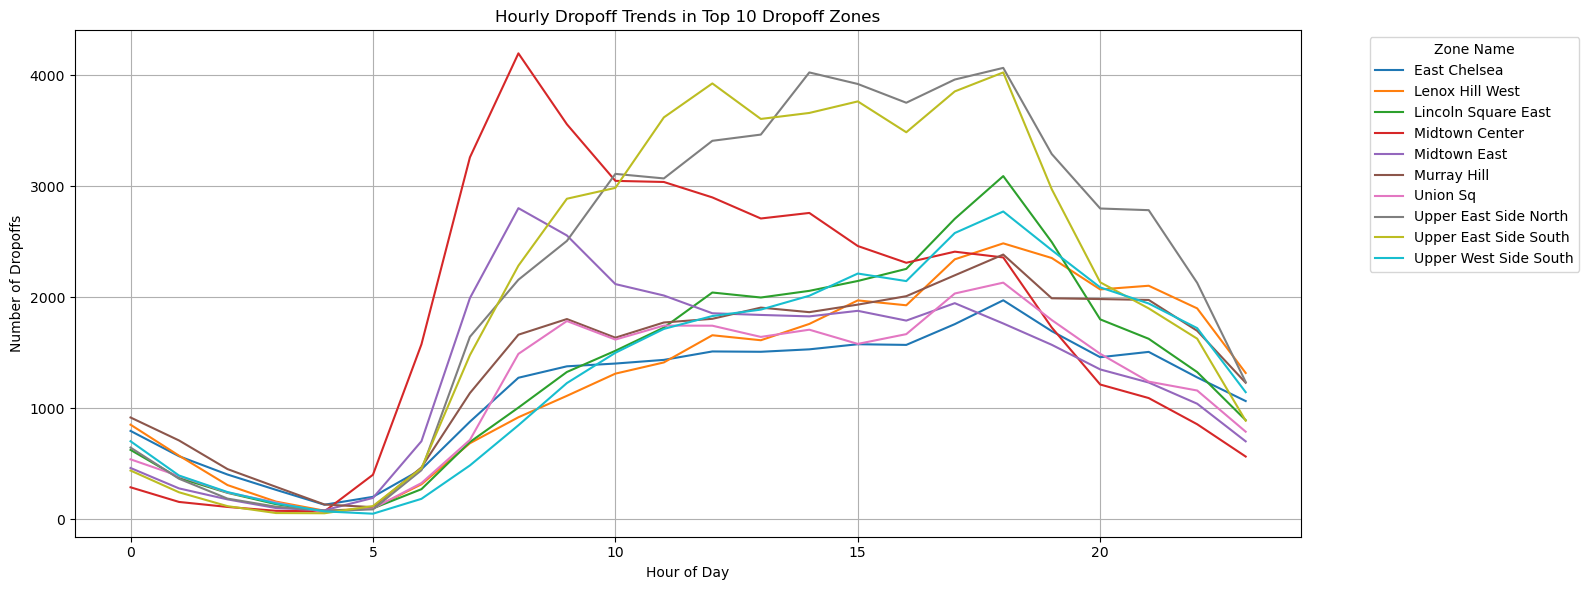

In [87]:
# Find top 10 pickup and dropoff zones
#df_cleaned.info()
# Ensure matching types for merge
zones['LocationID'] = zones['LocationID'].astype(int)
pickup_counts['PULocationID'] = pickup_counts['PULocationID'].astype(int)
dropoff_counts['DOLocationID'] = dropoff_counts['DOLocationID'].astype(int)

# Add zone names to pickup and dropoff counts
pickup_counts = pickup_counts.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
dropoff_counts = dropoff_counts.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

# Get top 10 zones based on total pickups and dropoffs
top_pickup_zones = pickup_counts.groupby('zone')['pickup_count'].sum().sort_values(ascending=False).head(10).index
top_dropoff_zones = dropoff_counts.groupby('zone')['dropoff_count'].sum().sort_values(ascending=False).head(10).index

# Filter to only top zones
top_pickups = pickup_counts[pickup_counts['zone'].isin(top_pickup_zones)]
top_dropoffs = dropoff_counts[dropoff_counts['zone'].isin(top_dropoff_zones)]

# Plotting pickup trends
plt.figure(figsize=(16, 6))
sns.lineplot(data=top_pickups, x='pickup_hour', y='pickup_count', hue='zone', palette='tab10')
plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title='Zone Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting dropoff trends
plt.figure(figsize=(16, 6))
sns.lineplot(data=top_dropoffs, x='pickup_hour', y='dropoff_count', hue='zone', palette='tab10')
plt.title("Hourly Dropoff Trends in Top 10 Dropoff Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.legend(title='Zone Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

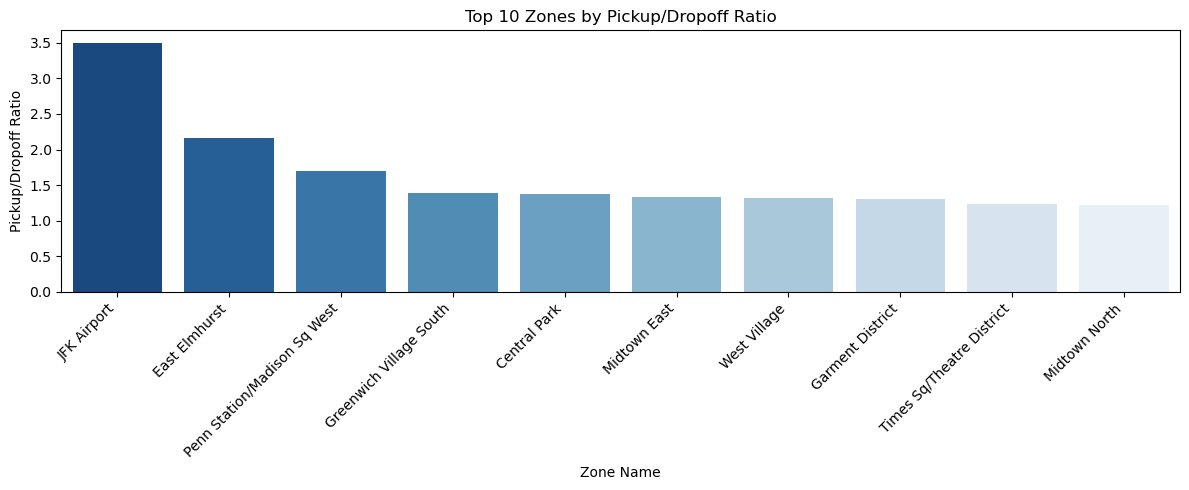

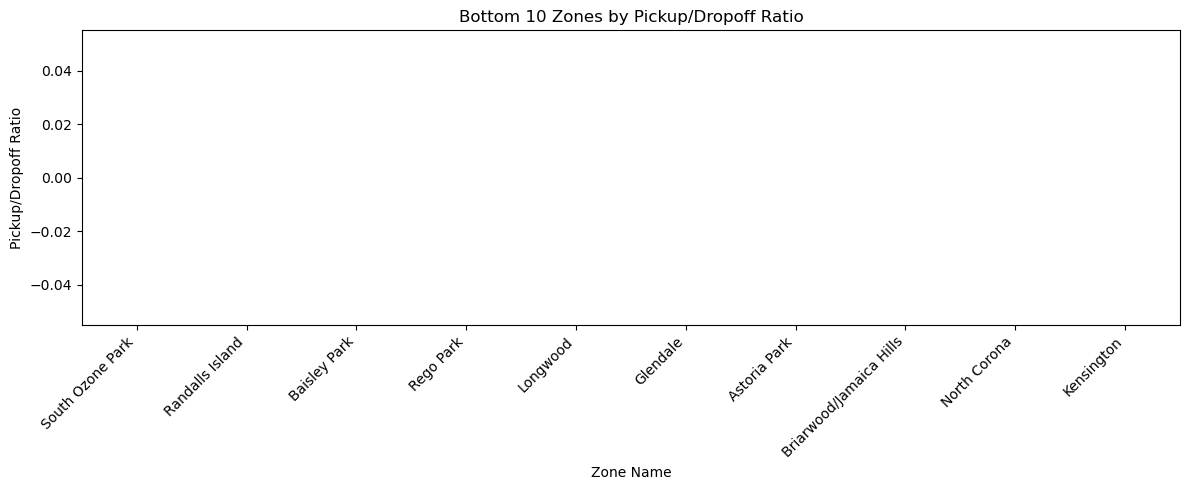

In [88]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#df_cleaned.columns.to_list()
# Step 1: Count pickups and dropoffs by Location ID
pickup_totals = df_cleaned['PULocationID'].value_counts().reset_index()
pickup_totals.columns = ['LocationID', 'total_pickups']
pickup_totals['LocationID'] = pickup_totals['LocationID'].astype(int)

dropoff_totals = df_cleaned['DOLocationID'].value_counts().reset_index()
dropoff_totals.columns = ['LocationID', 'total_dropoffs']
dropoff_totals['LocationID'] = dropoff_totals['LocationID'].astype(int)

# Step 2: Merge pickup and dropoff totals
pickup_dropoff_ratio = pd.merge(pickup_totals, dropoff_totals, on='LocationID', how='outer').fillna(0)

# Step 3: Compute the ratio safely
pickup_dropoff_ratio['pickup_dropoff_ratio'] = pickup_dropoff_ratio['total_pickups'] / pickup_dropoff_ratio['total_dropoffs'].replace(0, np.nan)

# Step 4: Merge with zone names from `zones` GeoDataFrame
zones['LocationID'] = zones['LocationID'].astype(int)  # Ensure dtype match
pickup_dropoff_ratio = pickup_dropoff_ratio.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Step 5: Get top 10 and bottom 10 by pickup/dropoff ratio
top_10_zones = pickup_dropoff_ratio.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_zones = pickup_dropoff_ratio.sort_values('pickup_dropoff_ratio').head(10)

# Step 6: Plot Top 10
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_zones, x='zone', y='pickup_dropoff_ratio', palette='Blues_r')
plt.title('Top 10 Zones by Pickup/Dropoff Ratio')
plt.xlabel('Zone Name')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 7: Plot Bottom 10
plt.figure(figsize=(12, 5))
sns.barplot(data=bottom_10_zones, x='zone', y='pickup_dropoff_ratio', palette='Oranges')
plt.title('Bottom 10 Zones by Pickup/Dropoff Ratio')
plt.xlabel('Zone Name')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

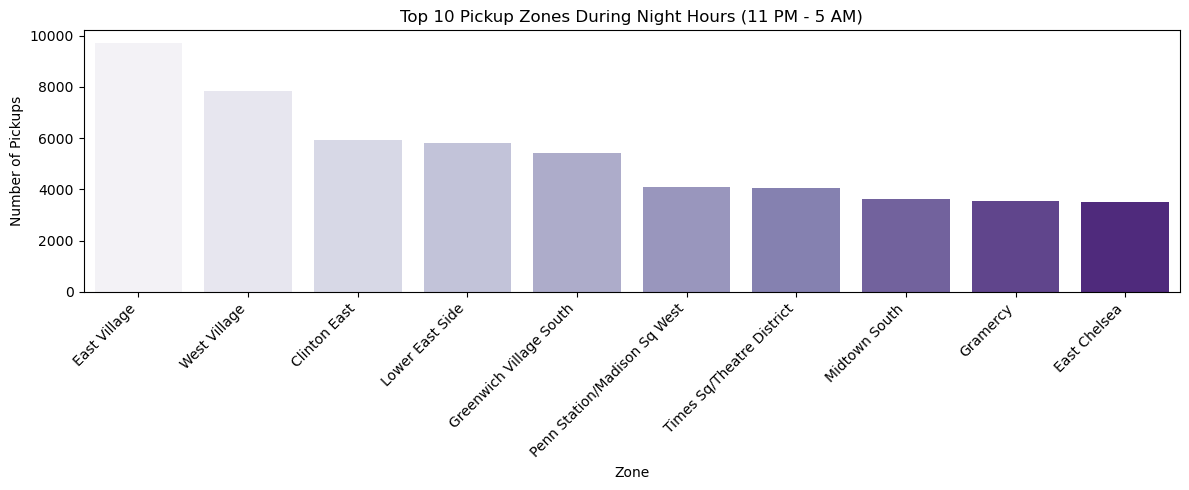

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

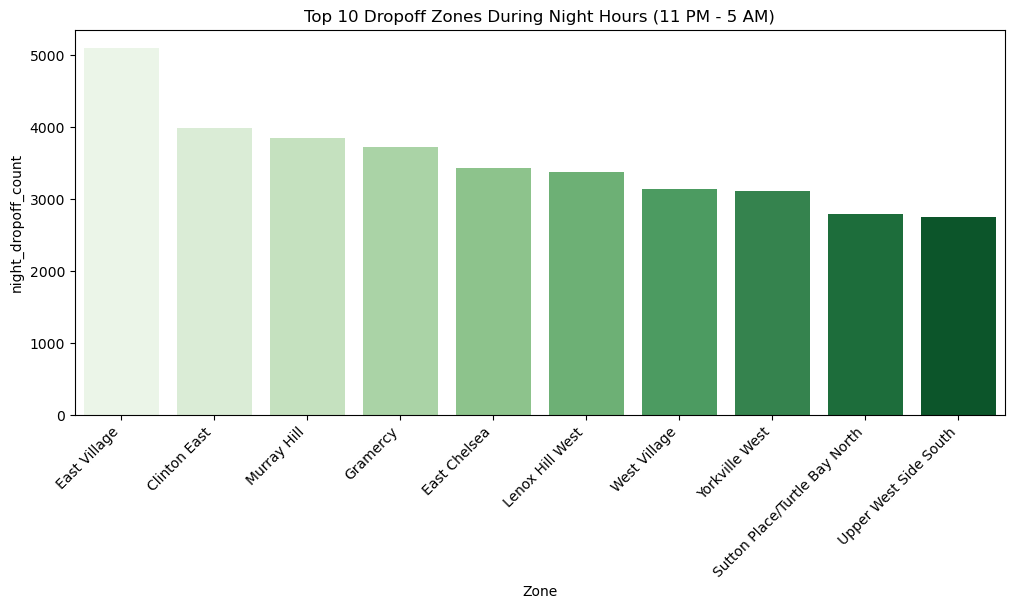

In [90]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Step 1: Filter data for night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]  # 0 to 5 and 23
df_night = df_cleaned[df_cleaned['pickup_hour'].isin(night_hours)]

# Step 2: Count pickups and dropoffs during night hours
night_pickups = df_night['PULocationID'].value_counts().reset_index()
night_pickups.columns = ['LocationID', 'night_pickup_count']
night_pickups['LocationID'] = night_pickups['LocationID'].astype(int)

night_dropoffs = df_night['DOLocationID'].value_counts().reset_index()
night_dropoffs.columns = ['LocationID', 'night_dropoff_count']
night_dropoffs['LocationID'] = night_dropoffs['LocationID'].astype(int)

# Step 3: Merge with zones to get zone names
zones['LocationID'] = zones['LocationID'].astype(int)
pickup_zones = night_pickups.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
dropoff_zones = night_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Step 4: Select top 10
top_night_pickups = pickup_zones.sort_values(by='night_pickup_count', ascending=False).head(10)
top_night_dropoffs = dropoff_zones.sort_values(by='night_dropoff_count', ascending=False).head(10)

# Step 5: Plot - Top Night Pickups
plt.figure(figsize=(12, 5))
sns.barplot(data=top_night_pickups, x='zone', y='night_pickup_count', palette='Purples')
plt.title('Top 10 Pickup Zones During Night Hours (11 PM - 5 AM)')
plt.xlabel('Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 6: Plot - Top Night Dropoffs
plt.figure(figsize=(12, 5))
sns.barplot(data=top_night_dropoffs, x='zone', y='night_dropoff_count', palette='Greens')
plt.title('Top 10 Dropoff Zones During Night Hours (11 PM - 5 AM)')
plt.xlabel('Zone')
plt.xticks(rotation=45, ha='right')
plt.ylabel




Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [91]:
# Filter for night hours (11 PM to 5 AM)

# Define night and day hours
night_hours = list(range(0, 6)) + [23]
day_hours = list(range(6, 23))  # 6 AM to 10 PM (excluding 23)

# Filter night and day trips
night_trips = df_cleaned[df_cleaned['pickup_hour'].isin(night_hours)]
day_trips = df_cleaned[df_cleaned['pickup_hour'].isin(day_hours)]

# Calculate total revenue for night and day
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Compute revenue share
night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

# Display results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2%}")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2%}")


Nighttime Revenue Share (11 PM - 5 AM): 11.27%
Daytime Revenue Share (6 AM - 10 PM): 88.73%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [92]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out entries with zero trip distance or fare amount to avoid division issues
filtered_df = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['fare_amount'] > 0) & (df_cleaned['passenger_count'] > 0)]

# Compute fare per mile per passenger for each trip
filtered_df['fare_per_mile_per_passenger'] = filtered_df['fare_amount'] / (filtered_df['trip_distance'] * filtered_df['passenger_count'])

# Group by passenger count and calculate the average
avg_fare_by_passenger = filtered_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Rename for clarity
avg_fare_by_passenger.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']

# Display the result
print(avg_fare_by_passenger)



   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         8.322134


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

pickup_day_of_week
Monday       8.051563
Tuesday      8.590322
Wednesday    8.688029
Thursday     8.692088
Friday       8.315511
Saturday     7.995750
Sunday       7.551839
Name: fare_per_mile, dtype: float64


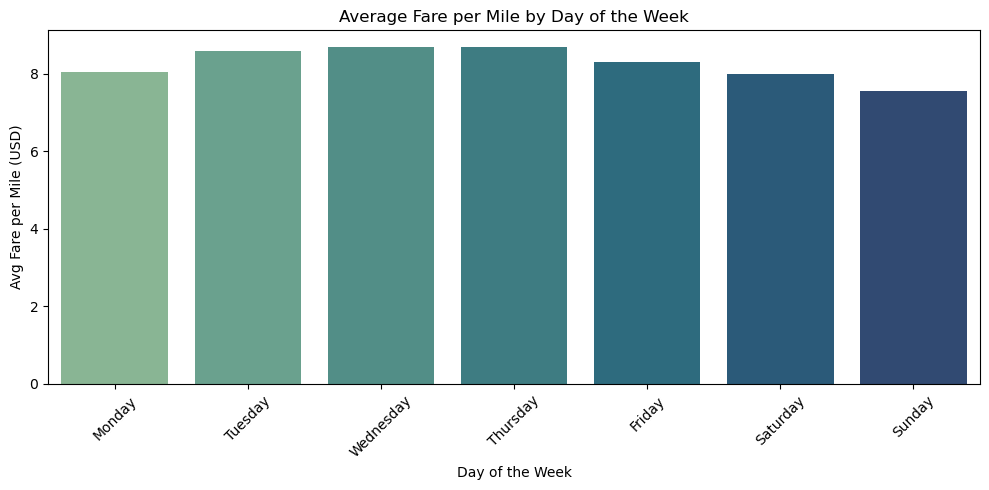

pickup_hour
0     6.843875
1     6.778764
2     6.571053
3     6.531531
4     6.280393
5     6.559325
6     6.755908
7     7.350698
8     8.130455
9     8.563864
10    8.736262
11    9.088844
12    9.251833
13    9.162146
14    9.203765
15    9.280672
16    9.042589
17    8.880845
18    8.572631
19    8.447212
20    7.638202
21    7.313363
22    7.200463
23    7.026431
Name: fare_per_mile, dtype: float64


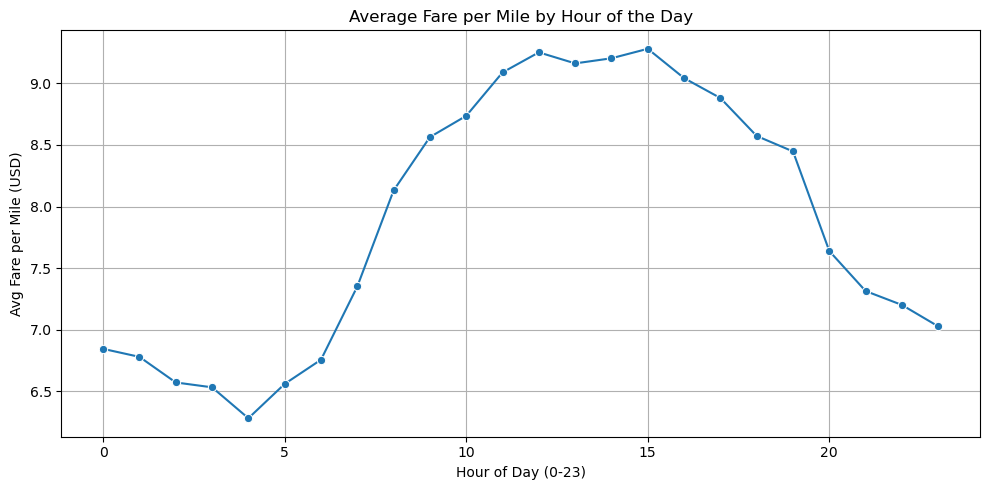

In [122]:
# Compare the average fare per mile for different days and for different times of the day
# Filter out invalid data
valid_fare_df = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['fare_amount'] > 0)].copy()

# Calculate fare per mile
valid_fare_df['fare_per_mile'] = valid_fare_df['fare_amount'] / valid_fare_df['trip_distance']

# Group by pickup_day_of_week
fare_by_day = valid_fare_df.groupby('pickup_day_of_week')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print(fare_by_day)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette='crest')
plt.title("Average Fare per Mile by Day of the Week")
plt.ylabel("Avg Fare per Mile (USD)")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by pickup_hour
fare_by_hour = valid_fare_df.groupby('pickup_hour')['fare_per_mile'].mean()
print(fare_by_hour)
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=fare_by_hour.index, y=fare_by_hour.values, marker='o')
plt.title("Average Fare per Mile by Hour of the Day")
plt.ylabel("Avg Fare per Mile (USD)")
plt.xlabel("Hour of Day (0-23)")
plt.grid(True)
plt.tight_layout()
plt.show()





**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

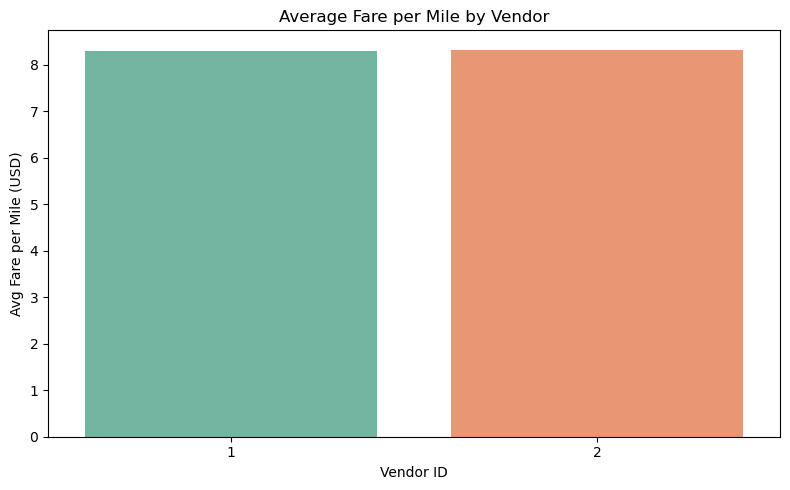

In [125]:
# Compare fare per mile for different vendors
#print(df_cleaned['VendorID'].unique())
# Filter valid trips
valid_vendor_df = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['fare_amount'] > 0)].copy()

# Calculate fare per mile
valid_vendor_df['fare_per_mile'] = valid_vendor_df['fare_amount'] / valid_vendor_df['trip_distance']

# Group by VendorID
fare_by_vendor = valid_vendor_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x='VendorID', y='fare_per_mile', palette='Set2')
plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


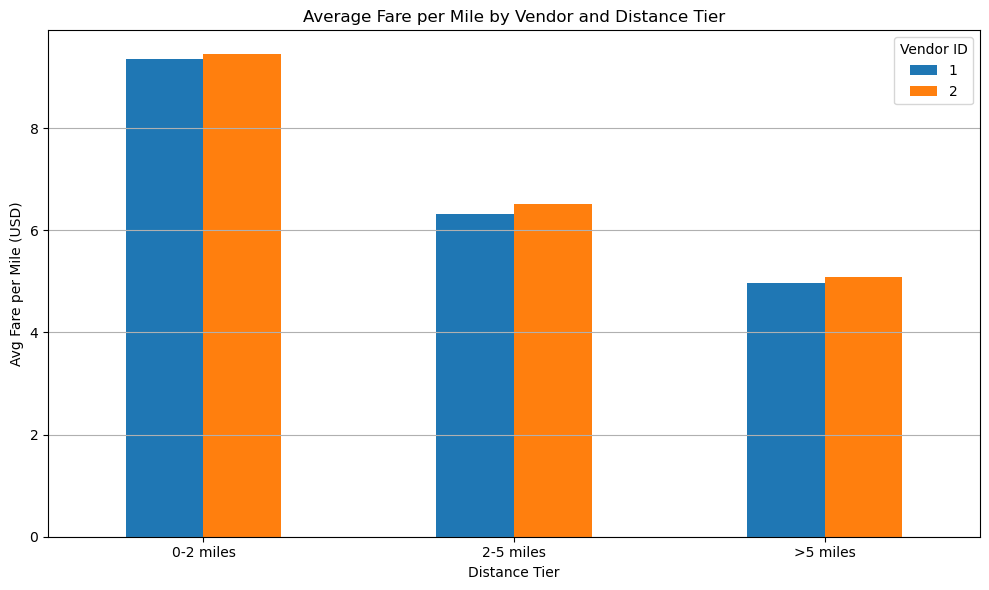

In [100]:
# Defining distance tiers

# Filter out invalid data
df_vendor = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['fare_amount'] > 0)].copy()

# Calculate fare per mile
df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

# Create distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif 2 < dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_vendor['distance_tier'] = df_vendor['trip_distance'].apply(distance_tier)

# Group by Vendor and Distance Tier
tiered_vendor_fare = df_vendor.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Pivot for better visualization
pivoted = tiered_vendor_fare.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')

# Plot
pivoted.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.ylabel('Avg Fare per Mile (USD)')
plt.xlabel('Distance Tier')
plt.xticks(rotation=0)
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Trip Percentage is higher when short trips are made and the tip percentage goes down as the trip distance goes up


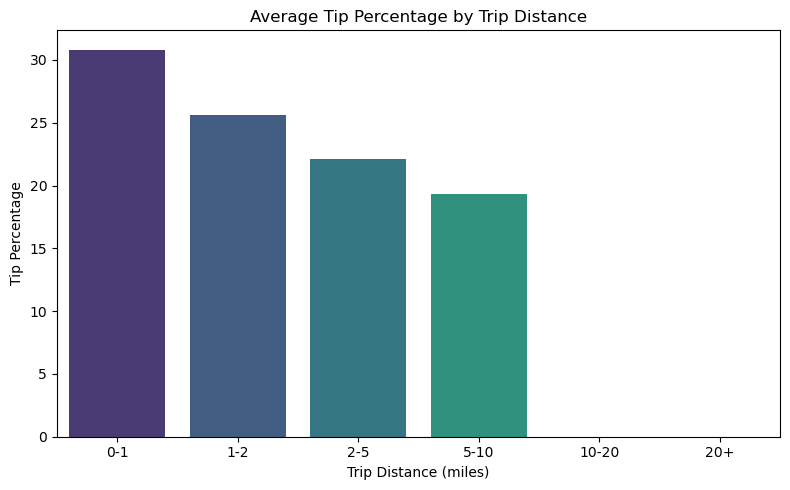

In [102]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filter to valid trips where fare_amount > 0
df_tips = df_cleaned[df_cleaned['fare_amount'] > 0].copy()

# Compute tip percentage
df_tips['tip_percentage'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100

# Create distance bins
distance_bins = [0, 1, 2, 5, 10, 20, np.inf]
distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20+']
df_tips['distance_bin'] = pd.cut(df_tips['trip_distance'], bins=distance_bins, labels=distance_labels)

# Group by distance bin
tip_by_distance = df_tips.groupby('distance_bin')['tip_percentage'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percentage', palette='viridis')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Busiest hours have more percentage of the tips and less than 10% tips are less during busiest hour

                Metric   <10% Tip   >25% Tip
0     Average Distance   2.329576   1.525979
1         Average Fare  16.052761  11.388472
2          Average Tip   0.718508   3.498343
3  Avg Passenger Count   1.000000   1.000000
4      Avg Pickup Hour  13.812235  14.507723
              <10% Tip  >25% Tip
payment_type                    
1                100.0     100.0


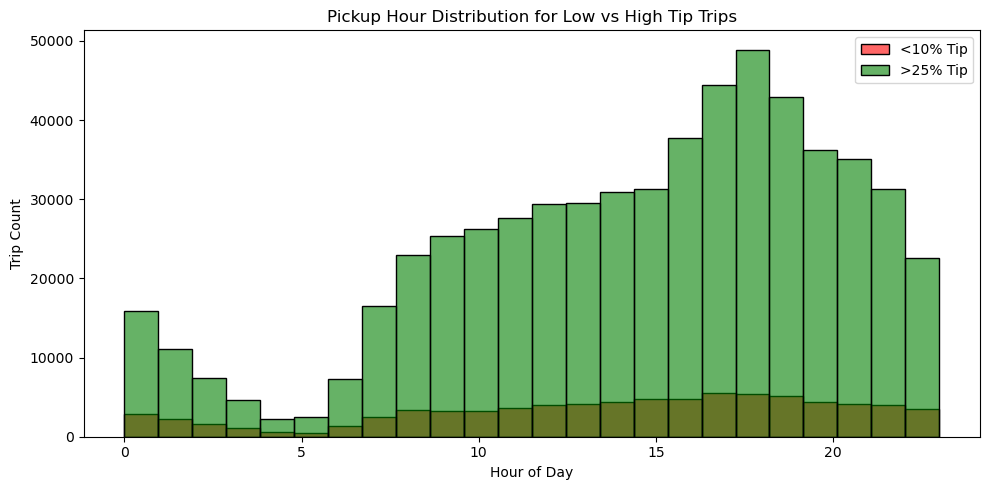

In [104]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df_tips[df_tips['tip_percentage'] < 10]
high_tip_trips = df_tips[df_tips['tip_percentage'] > 25]

comparison = pd.DataFrame({
    'Metric': ['Average Distance', 'Average Fare', 'Average Tip', 'Avg Passenger Count', 'Avg Pickup Hour'],
    '<10% Tip': [
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['tip_amount'].mean(),
        low_tip_trips['passenger_count'].mean(),
        low_tip_trips['pickup_hour'].mean()
    ],
    '>25% Tip': [
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['tip_amount'].mean(),
        high_tip_trips['passenger_count'].mean(),
        high_tip_trips['pickup_hour'].mean()
    ]
})

print(comparison)

payment_comparison = pd.DataFrame({
    '<10% Tip': low_tip_trips['payment_type'].value_counts(normalize=True) * 100,
    '>25% Tip': high_tip_trips['payment_type'].value_counts(normalize=True) * 100
}).fillna(0)

print(payment_comparison)

# Distribution of pickup hours for both groups
plt.figure(figsize=(10, 5))
sns.histplot(low_tip_trips['pickup_hour'], bins=24, color='red', alpha=0.6, label='<10% Tip')
sns.histplot(high_tip_trips['pickup_hour'], bins=24, color='green', alpha=0.6, label='>25% Tip')
plt.title("Pickup Hour Distribution for Low vs High Tip Trips")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.legend()
plt.tight_layout()
plt.show()




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

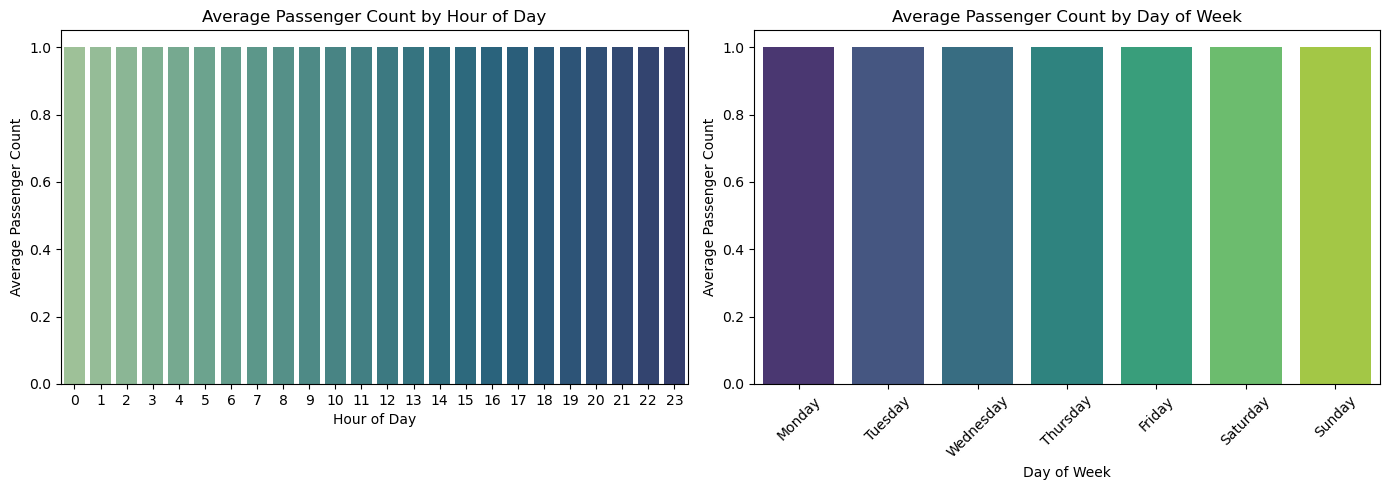

In [129]:
# See how passenger count varies across hours and days

# Group by hour of the day
hourly_passenger_count = df_cleaned.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by day of the week
daily_passenger_count = df_cleaned.groupby('pickup_day_of_week')['passenger_count'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()



plt.figure(figsize=(14, 5))

# Hourly average passenger count
plt.subplot(1, 2, 1)
sns.barplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', palette='crest')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')

# Daily average passenger count
plt.subplot(1, 2, 2)
sns.barplot(data=daily_passenger_count, x='pickup_day_of_week', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

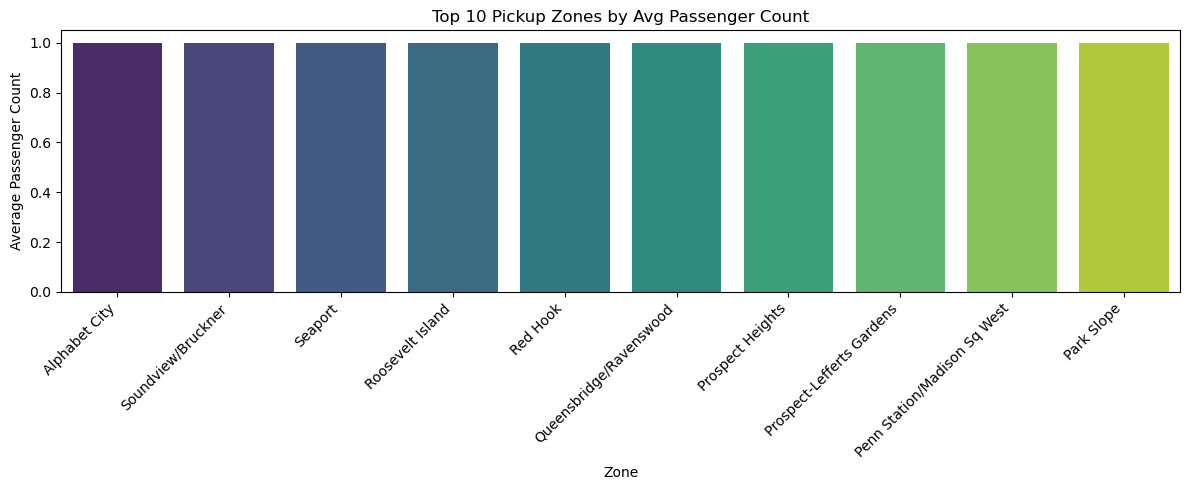

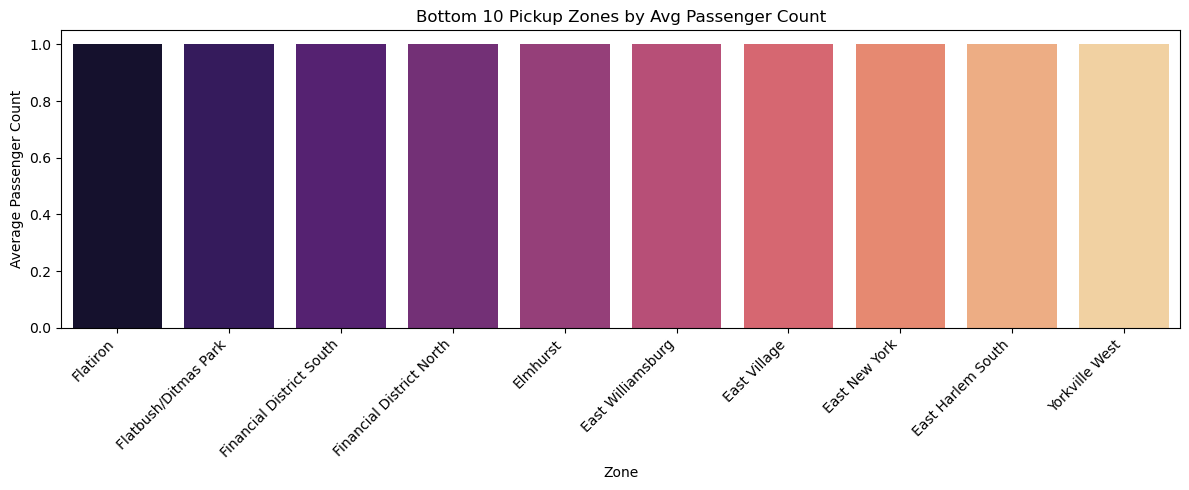

In [112]:
# How does passenger count vary across zones
# Group by pickup location and calculate average passenger count
avg_passenger_by_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

# Convert LocationID to same type as in zones (probably object/string)
avg_passenger_by_zone['LocationID'] = avg_passenger_by_zone['LocationID'].astype(str)
# Merge with zone info to get zone names
# Ensuring both columns are of the same type (convert to string for merging), bexause i got error
avg_passenger_by_zone['LocationID'] = avg_passenger_by_zone['LocationID'].astype(str)
zones['LocationID'] = zones['LocationID'].astype(str)

zone_passenger_counts = zones[['LocationID', 'zone']].merge(
    avg_passenger_by_zone, on='LocationID', how='left'
)

# Drop rows where passenger count is missing and sort
zone_passenger_counts = zone_passenger_counts.dropna(subset=['avg_passenger_count'])
zone_passenger_counts = zone_passenger_counts.sort_values(by='avg_passenger_count', ascending=False)

# Top 10 zones
plt.figure(figsize=(12, 5))
sns.barplot(data=zone_passenger_counts.head(10), x='zone', y='avg_passenger_count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Pickup Zones by Avg Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.tight_layout()
plt.show()

# Bottom 10 zones
plt.figure(figsize=(12, 5))
sns.barplot(data=zone_passenger_counts.tail(10), x='zone', y='avg_passenger_count', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Pickup Zones by Avg Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.tight_layout()
plt.show()


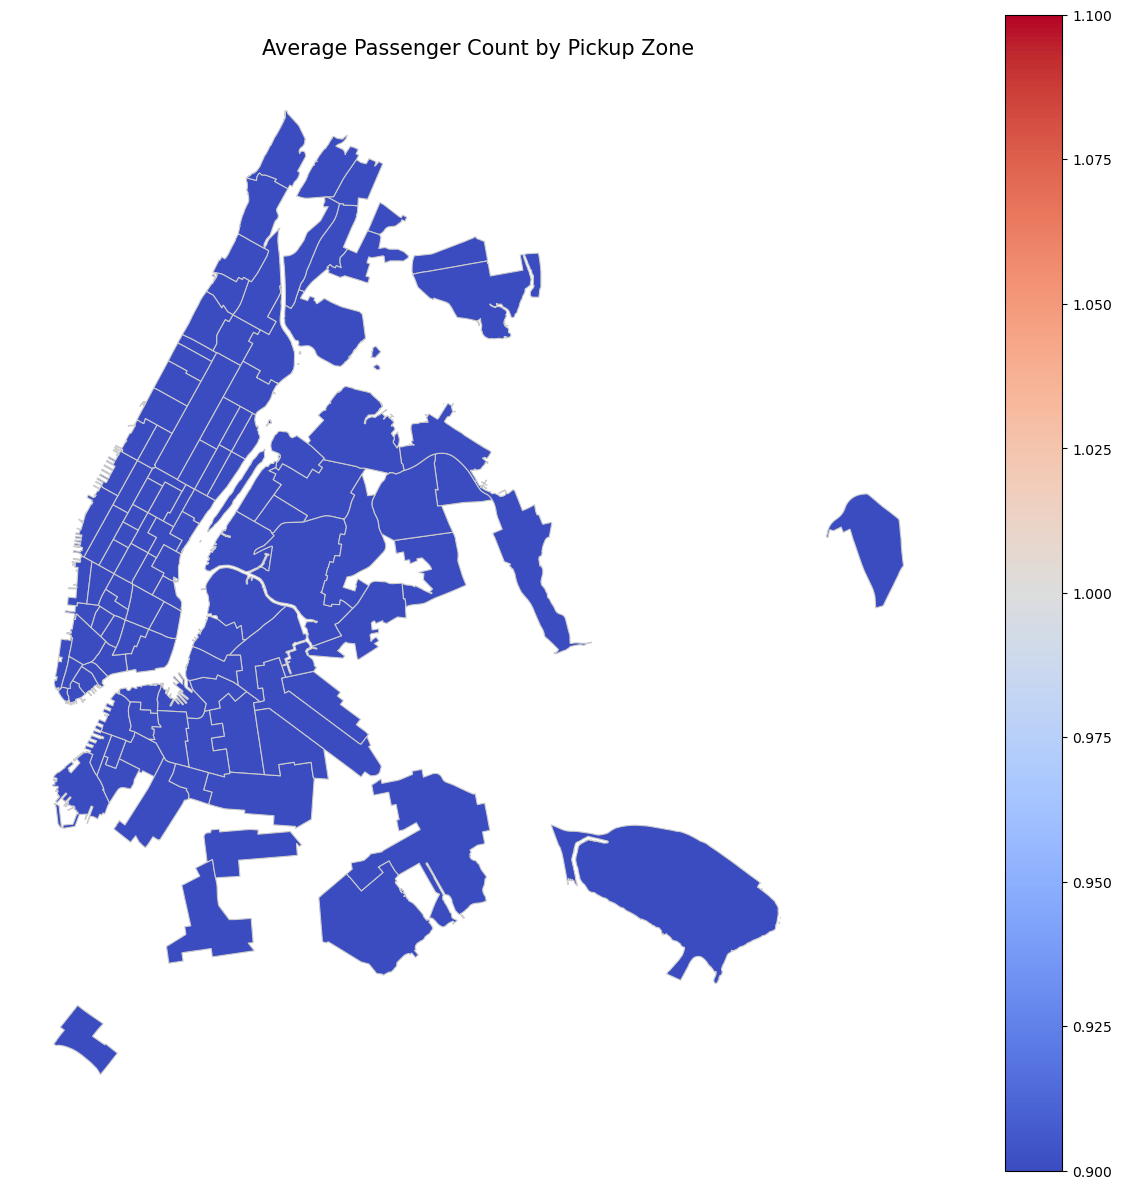

In [113]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passenger count for each pickup zone
avg_passenger_by_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

# Convert LocationID to string to match the zones DataFrame
avg_passenger_by_zone['LocationID'] = avg_passenger_by_zone['LocationID'].astype(str)
zones['LocationID'] = zones['LocationID'].astype(str)

# Merge with zones GeoDataFrame to preserve spatial data
zones_with_passenger = zones.merge(avg_passenger_by_zone, on='LocationID', how='left')

# Set figure size and plot
fig, ax = plt.subplots(figsize=(12, 12))
zones_with_passenger.plot(column='avg_passenger_count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Passenger Count by Pickup Zone', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()




Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

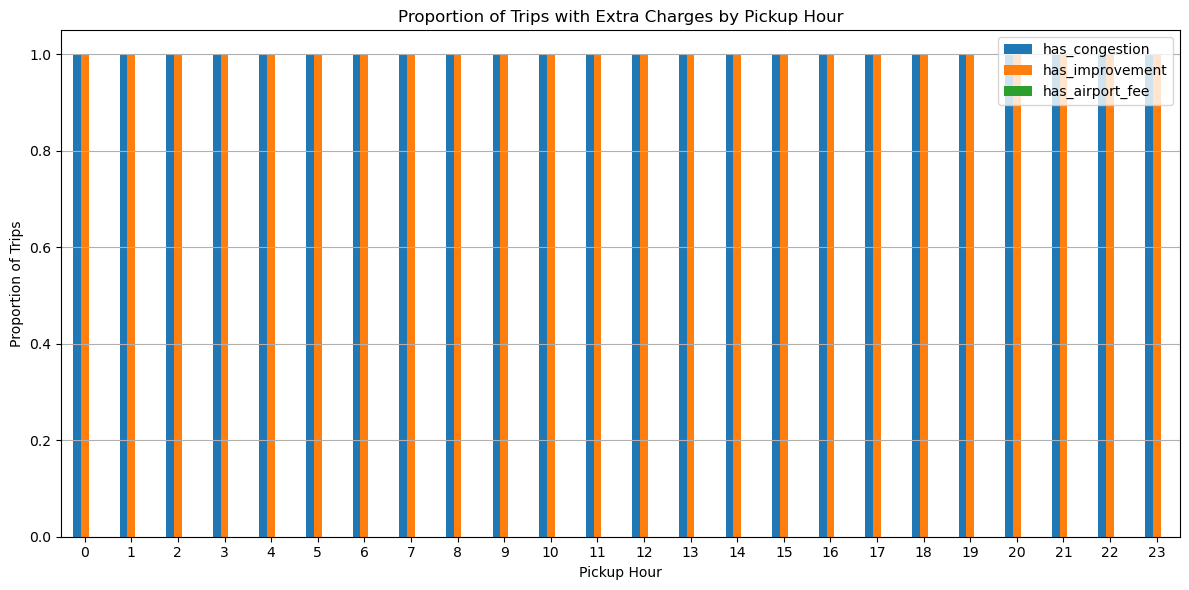

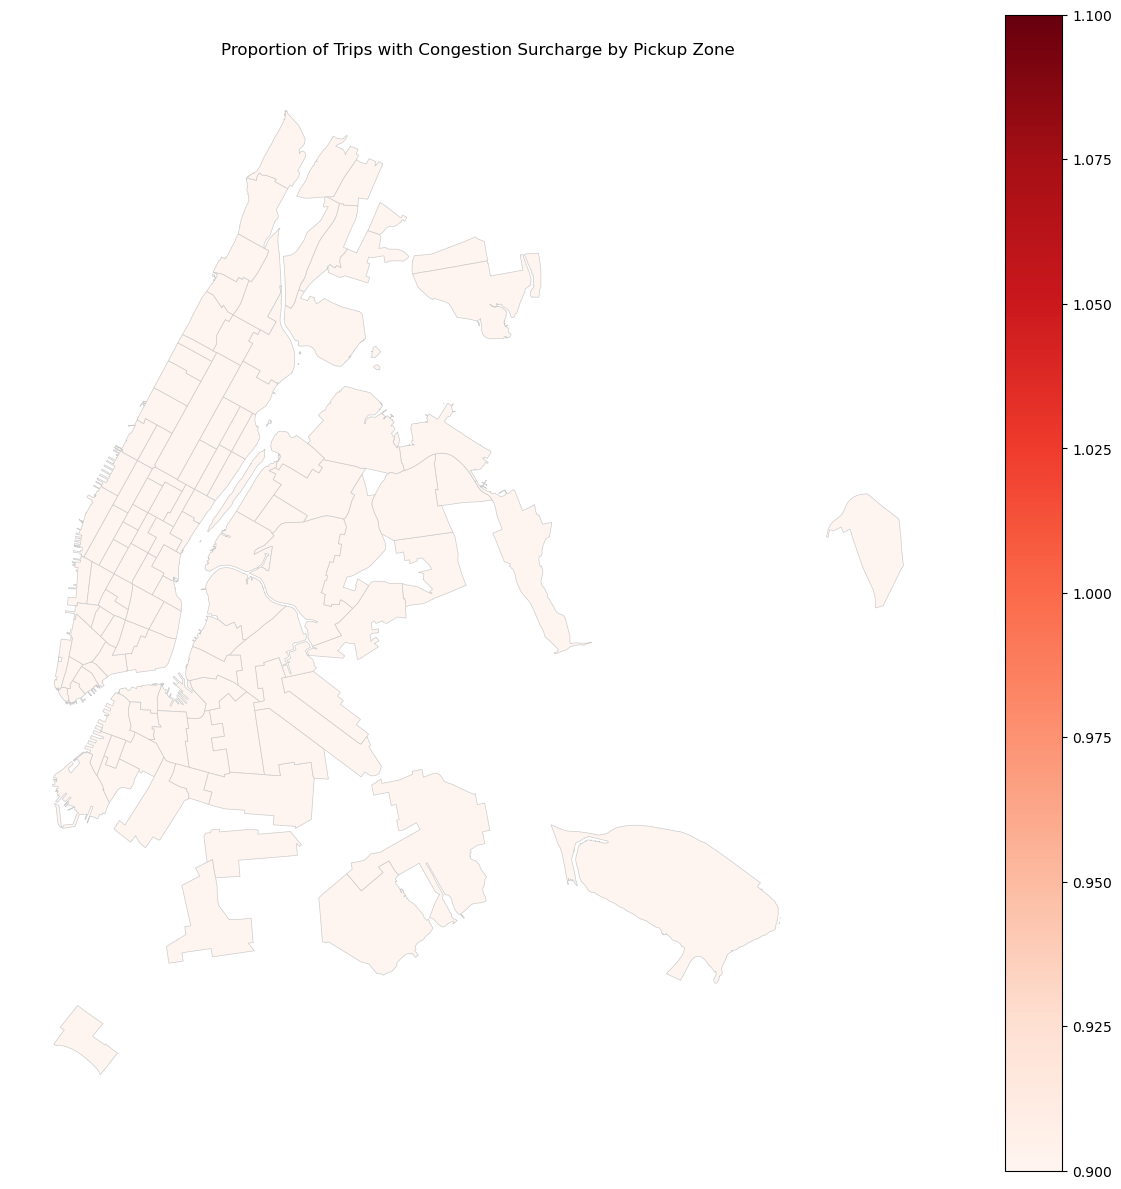

In [116]:
# How often is each surcharge applied?
df_cleaned['has_congestion'] = df_cleaned['congestion_surcharge'] > 0
df_cleaned['has_improvement'] = df_cleaned['improvement_surcharge'] > 0
df_cleaned['has_airport_fee'] = df_cleaned['airport_fee_total'] > 0

extra_by_hour = df_cleaned.groupby('pickup_hour')[['has_congestion', 'has_improvement', 'has_airport_fee']].mean().reset_index()

# Plot
extra_by_hour.plot(x='pickup_hour', kind='bar', figsize=(12,6), stacked=False)
plt.title("Proportion of Trips with Extra Charges by Pickup Hour")
plt.ylabel("Proportion of Trips")
plt.xlabel("Pickup Hour")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Group by pickup zone
extra_by_zone = df_cleaned.groupby('PULocationID')[['has_congestion', 'has_improvement', 'has_airport_fee']].mean().reset_index()
extra_by_zone['LocationID'] = extra_by_zone['PULocationID'].astype(str)

# Merge with zone shapefile for spatial visualization
zones['LocationID'] = zones['LocationID'].astype(str)
zones_charges = zones.merge(extra_by_zone, on='LocationID', how='left')


fig, ax = plt.subplots(figsize=(12,12))
zones_charges.plot(column='has_congestion', cmap='Reds', linewidth=0.5, edgecolor='0.8', ax=ax, legend=True)
plt.title("Proportion of Trips with Congestion Surcharge by Pickup Zone")
plt.axis('off')
plt.tight_layout()
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Findings: <br><br>
Busiest Hours: Peak demand occurs during morning and evening commute hours (typically 7–9 AM and 5–8 PM), with sharp drop-offs during late nights and early afternoons.

Slowest Routes: Some routes showed consistently low average speeds (especially around dense areas during peak hours), indicating congestion or traffic delays.

Nighttime Demand: Though night trips account for only ~11% of revenue, some zones show consistent demand late at night, especially near nightlife and transport hubs.

Recommendations: <br><br>
Dynamic dispatching: Deploy more vehicles proactively during peak demand hours, especially in central business zones and transit-heavy areas.

Avoid slow zones during peak: Use historical speed data to avoid bottlenecks during peak periods—reroute or stagger availability.

Night shift optimization: While lower in volume, night trips can be targeted around hotspots to maintain driver earnings.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

<font bold > Strategic Cab Positioning by Zones, Time, and Season</font> <br><br>
Findings:
Top Zones: Certain zones (e.g., Midtown, JFK, LaGuardia, Financial District) consistently show high pickups and drop-offs across hours.

Weekly Trends: Fridays and weekends show elevated traffic, especially during evening hours.

Seasonality: Revenue peaks during months like May and October, indicating seasonal demand spikes.

Recommendations:
Zonal Cab Staging: Strategically position idle cabs near top pickup zones before peak periods. For example:

Morning: Near residential areas (to serve outbound commuters)

Evening: Near commercial and entertainment districts (for inbound returns)

Day-Based Optimization: Schedule more drivers on high-demand weekdays (Friday) and weekends, especially evening hours.

Seasonal Planning: Use monthly trends to prepare ahead of high-demand months with additional driver onboarding and shift planning.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.